### 2.

### Description and comparison of the grading methods used. Selection of the method they will recommend for use. Selection should be based on Accuracy (ACC).

### We will test each of the learned sorting methods and review which one gives us the best accuracy

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#get the data

df=pd.read_csv("Data/Data.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
#import library and split the dataset
from sklearn.model_selection import train_test_split
x,y=df[df.columns[:-1]],df['price_range']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [4]:
#import libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#Linear Regression 
from sklearn.linear_model import LinearRegression
#K Neighbors
from sklearn.neighbors import KNeighborsClassifier
#naive Bayes Gaussian
from sklearn.naive_bayes import GaussianNB
#naive Bayes Bernoulli
from sklearn.naive_bayes import BernoulliNB
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#Vectorial Support
from sklearn.svm import LinearSVC,SVC
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#Bagging 
from sklearn.ensemble import BaggingClassifier
# seed 
np.random.seed(1234)

res = []

### Linear Regression

In [5]:

lr=LinearRegression()
lr.fit(xtrain,ytrain)
lrYpred = lr.predict(xtest)
lrYpred[:10]
# values are not int    

array([2.24797637, 1.04196246, 1.19825659, 1.78808066, 2.69136013,
       1.08340212, 0.31499494, 0.4582406 , 2.36646584, 2.69008145])

In [6]:
#round the values to the nearest int
lrYpred=np.rint(lrYpred)
lrYpred[:10]

array([2., 1., 1., 2., 3., 1., 0., 0., 2., 3.])

In [7]:
#confusion matrix
confusion_matrix(ytest,lrYpred)

array([[  0,   0,   0,   0,   0,   0],
       [  6, 121,  15,   0,   0,   0],
       [  0,   0, 148,   6,   0,   0],
       [  0,   0,  12, 143,   0,   0],
       [  0,   0,   0,  27, 114,   8],
       [  0,   0,   0,   0,   0,   0]], dtype=int64)

In [8]:
#accuraccy
accScore = accuracy_score(ytest,lrYpred)
res.append("lr " + str(accScore))
accScore

0.8766666666666667

### K neighbours

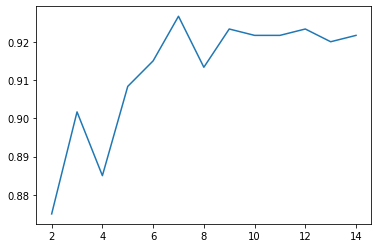

In [9]:
acc = []
for i in range(2,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred = knn.predict(xtest)
    acc.append(accuracy_score(ytest,pred))
plt.plot(range(2,15),acc)

In [10]:
knRes = [max(acc),acc.index(max(acc))+2]
knRes
res.append("Kn " + str(knRes[0]) + " " + str(knRes[1]) )

# Accuracy --- neighbours

### Gaussian Naive Bayes

In [11]:
gnb = GaussianNB()
gnb.fit(xtrain,ytrain)
gnbYpred = gnb.predict(xtest)
confusion_matrix(ytest,gnbYpred)
#confusion matrix

array([[122,  20,   0,   0],
       [ 16, 109,  29,   0],
       [  0,  33, 104,  18],
       [  0,   0,  17, 132]], dtype=int64)

In [12]:
accScore = accuracy_score(ytest,gnbYpred)
res.append("gnb " + str(accScore))
accScore

0.7783333333333333

### Bernoulli Naive Bayes

In [13]:
bnb = BernoulliNB()
bnb.fit(xtrain,ytrain)
bnbYpred = bnb.predict(xtest)
confusion_matrix(ytest,bnbYpred)
#confusion matrix

array([[36, 31, 32, 43],
       [46, 22, 41, 45],
       [46, 20, 40, 49],
       [47, 13, 37, 52]], dtype=int64)

In [14]:
accScore = accuracy_score(ytest,bnbYpred)
res.append("bnb " + str(accScore))
accScore

0.25

### Logistic regression

In [15]:
lor = LogisticRegression()
x2 = StandardScaler().fit_transform(x)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y,test_size=0.3,stratify=y)
lor.fit(x2_train,y2_train)
lorYpred=lor.predict(x2_test)
#confusion matrix
confusion_matrix(ytest,lorYpred)

array([[39, 32, 32, 39],
       [39, 39, 40, 36],
       [33, 41, 37, 44],
       [40, 37, 39, 33]], dtype=int64)

In [16]:
accScore = accuracy_score(y2_test,lorYpred)
res.append("lor " + str(accScore))
accScore

0.9483333333333334

### Linear Support Vector

In [17]:
lsv = LinearSVC(dual=False)
lsv.fit(xtrain,ytrain)
lsvYpred = lsv.predict(xtest)
confusion_matrix(ytest,lsvYpred)
#confusion matrix

array([[137,   4,   1,   0],
       [ 25,  81,  48,   0],
       [  0,  33, 103,  19],
       [  0,   0,   0, 149]], dtype=int64)

In [18]:
accScore = accuracy_score(ytest,lsvYpred)
res.append("lsv " + str(accScore))
accScore

0.7833333333333333

### C-Support Vector

In [19]:
sv = SVC()
sv.fit(xtrain,ytrain)
svYpred=sv.predict(xtest)
confusion_matrix(ytest,svYpred)
#confusion matrix

array([[141,   1,   0,   0],
       [  3, 148,   3,   0],
       [  0,  11, 138,   6],
       [  0,   0,   4, 145]], dtype=int64)

In [20]:
accScore = accuracy_score(ytest,svYpred)
res.append("sv " + str(accScore))
accScore

0.9533333333333334

### Decision Tree

In [21]:
tree = DecisionTreeClassifier()
tree.fit(xtrain,ytrain)
treeYpredict = tree.predict(xtest)
confusion_matrix(ytest,treeYpredict)
#confusion matrix

array([[120,  22,   0,   0],
       [ 19, 115,  20,   0],
       [  0,  24, 110,  21],
       [  0,   1,  17, 131]], dtype=int64)

In [22]:
accScore = accuracy_score(ytest,treeYpredict)
res.append("tree " + str(accScore))
accScore

0.7933333333333333

### Random Forest

In [23]:
Rforest = RandomForestClassifier()
Rforest.fit(xtrain,ytrain)
RforestYpred= Rforest.predict(xtest)
confusion_matrix(ytest,RforestYpred)
#confusion matrix

array([[132,  10,   0,   0],
       [ 12, 124,  18,   0],
       [  0,  24, 117,  14],
       [  0,   0,  12, 137]], dtype=int64)

In [24]:
accScore = accuracy_score(ytest,RforestYpred)
res.append("Rforest " + str(accScore))
accScore

0.85

#### Bagging

In [25]:
bagg=BaggingClassifier()
bagg.fit(xtrain,ytrain)
baggYpred=bagg.predict(xtest)
confusion_matrix(ytest,baggYpred)
#confusion matrix

array([[135,   7,   0,   0],
       [ 16, 129,   9,   0],
       [  0,  18, 121,  16],
       [  0,   0,  16, 133]], dtype=int64)

In [26]:
accScore = accuracy_score(ytest,baggYpred)
res.append("bagg " + str(accScore))
accScore

0.8633333333333333

In [27]:
res

['lr 0.8766666666666667',
 'Kn 0.9266666666666666 7',
 'gnb 0.7783333333333333',
 'bnb 0.25',
 'lor 0.9483333333333334',
 'lsv 0.7833333333333333',
 'sv 0.9533333333333334',
 'tree 0.7933333333333333',
 'Rforest 0.85',
 'bagg 0.8633333333333333']

### The methods with the highest accuracy are Logistic regression(lor) and C-Support Vector(sv)


### 3

### With the method selected in point 2 you must make the prediction of the price range of the cell phones whose characteristics are in the Predict.csv file.

### In the previous point we obtained that the best methods are Linear Support Vector an C-Support Vector, for this point we will use C-Support Vector as method



In [28]:
xFinal = pd.read_csv("Data/Predict.csv",index_col=0)
xFinal.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
id,,,,,,,,,,,,,,,,,,,,
1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [29]:
svpred = sv.predict(xFinal)
svpred[:10]

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0], dtype=int64)

In [30]:
xFinal["price_range"] = svpred
xFinal.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
id,,,,,,,,,,,,,,,,,,,,,
1,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
2,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
3,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
4,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
5,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


In [31]:
xFinal.to_excel("Result.xlsx")